In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
index = pd.read_csv('data/index2013_data.csv')
#del index['Unnamed: 0']

In [11]:
# Creating a dict of dataframes, separated by Index Year
# This can easily be changed to seperate by Country instead if desired
unique_country = index['Index Year'].unique()

country_dict_df = {elem : pd.DataFrame() for elem in unique_country}
country_dict_df

for key in country_dict_df.keys():
    country_dict_df[key] = index[:][index['Index Year'] == key]

In [13]:
freedom_data = country_dict_df[2013]
diversity_data = pd.read_csv("data/HIEF_data.csv")

In [14]:
freedom_data = freedom_data.drop(freedom_data.columns[[5,8]], axis=1)

In [15]:
freedom_data.count()

Name                    185
Index Year              185
Overall Score           177
Property Rights         180
Government Integrity    184
Tax Burden              179
Government Spending     180
Business Freedom        183
Labor Freedom           182
Monetary Freedom        181
Trade Freedom           180
Investment Freedom      182
Financial Freedom       180
dtype: int64

In [16]:
freedom_data = freedom_data.dropna()
freedom_data[0:40]

,Name,Index Year,Overall Score,Property Rights,Government Integrity,Tax Burden,Government Spending,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
1,Albania,2013,65.2,30.0,31.0,92.6,75.1,81.0,49.0,78.4,79.8,65.0,70.0
2,Algeria,2013,49.6,30.0,29.0,80.4,44.1,65.2,52.6,76.6,67.8,20.0,30.0
3,Angola,2013,47.3,15.0,20.0,82.6,60.6,43.1,44.8,61.5,70.2,35.0,40.0
4,Argentina,2013,46.7,15.0,30.0,64.3,52.1,60.1,47.4,60.4,67.6,40.0,30.0
5,Armenia,2013,69.4,30.0,26.0,88.0,82.1,87.6,77.1,73.0,85.4,75.0,70.0
6,Australia,2013,82.6,90.0,88.0,66.4,62.8,95.5,83.5,83.8,86.2,80.0,90.0
7,Austria,2013,71.8,90.0,78.0,51.1,23.5,73.6,80.4,79.3,86.8,85.0,70.0
8,Azerbaijan,2013,59.7,25.0,24.0,85.5,67.8,69.2,79.4,73.5,77.2,55.0,40.0
9,Bahrain,2013,75.5,55.0,51.0,99.9,72.4,75.8,90.4,72.5,82.8,75.0,80.0
10,Bangladesh,2013,52.6,20.0,27.0,72.7,92.1,68.0,51.9,65.4,54.0,55.0,20.0


In [17]:
diversity_data

,Country,Year,EFindex
0,United Kingdom,1945,0.309
1,United Kingdom,1946,0.309
2,United Kingdom,1947,0.309
3,United Kingdom,1948,0.309
4,United Kingdom,1949,0.309
...,...,...,...
8803,Fiji,2009,0.534
8804,Fiji,2010,0.533
8805,Fiji,2011,0.531
8806,Fiji,2012,0.529


In [18]:
diversity_data = diversity_data[diversity_data['Year'] == 2013]
diversity_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 68 to 8807
Data columns (total 3 columns):
Country    156 non-null object
Year       156 non-null int64
EFindex    156 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.9+ KB


In [19]:
merged_data = freedom_data.merge(diversity_data, how="left", left_on="Name", right_on = "Country")

In [20]:
merged_data = merged_data.dropna(subset=["EFindex"])

In [21]:
from sklearn.linear_model import LinearRegression
X = merged_data["Overall Score"].values.reshape(-1,1)
y = merged_data["EFindex"].tolist()
model = LinearRegression()
y

[0.139,
 0.37200000000000005,
 0.779,
 0.158,
 0.045,
 0.276,
 0.248,
 0.122,
 0.5820000000000001,
 0.309,
 0.5920000000000001,
 0.764,
 0.6509999999999999,
 0.5720000000000001,
 0.395,
 0.5589999999999999,
 0.289,
 0.767,
 0.308,
 0.158,
 0.73,
 0.79,
 0.855,
 0.439,
 0.19,
 0.639,
 0.054000000000000006,
 0.171,
 0.517,
 0.34700000000000003,
 0.262,
 0.7,
 0.177,
 0.649,
 0.45299999999999996,
 0.528,
 0.040999999999999995,
 0.659,
 0.45799999999999996,
 0.7829999999999999,
 0.528,
 0.138,
 0.789,
 0.36700000000000005,
 0.736,
 0.16699999999999998,
 0.727,
 0.8079999999999999,
 0.695,
 0.105,
 0.8029999999999999,
 0.743,
 0.174,
 0.376,
 0.11,
 0.019,
 0.044000000000000004,
 0.5379999999999999,
 0.855,
 0.765,
 0.634,
 0.547,
 0.133,
 0.313,
 0.889,
 0.284,
 0.562,
 0.19399999999999998,
 0.7909999999999999,
 0.852,
 0.713,
 0.466,
 0.5870000000000001,
 0.42700000000000005,
 0.315,
 0.5660000000000001,
 0.76,
 0.86,
 0.354,
 0.485,
 0.6659999999999999,
 0.85,
 0.151,
 0.597,
 0.618,
 0.

In [22]:
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [23]:
model = LinearRegression(normalize=True)
model.fit(X,y)
score = model.score(X,y)
print(f'R^2 Score: {score}')

R^2 Score: 0.052194670739199256


In [24]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [-0.00519278]
y-axis intercept:  0.7823977968397481


In [25]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 0.139
Predicted output: 0.44382840443733984
Prediction Error: 0.30482840443733983


In [26]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,0.443828,0.139,0.304828
1,0.524836,0.372,0.152836
2,0.536779,0.779,-0.242221
3,0.539895,0.158,0.381895
4,0.422019,0.045,0.377019
...,...,...,...
114,0.413191,0.684,-0.270809
115,0.393978,0.399,-0.005022
116,0.543530,0.313,0.230530
117,0.477581,0.706,-0.228419


In [27]:
y = merged_data["EFindex"].values.reshape(-1,1)
x_min = X.min()
x_max = X.max()
y_min_actual = y.min()
y_max_actual = y.max()

In [28]:
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 0.019
Predicted Min Value: [0.63440351]
Actual Max Value: 0.889
Predicted Max Value: [0.32543297]


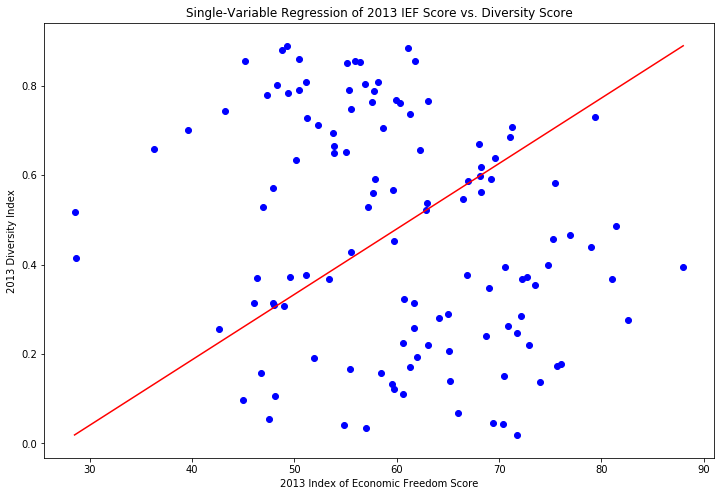

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min_actual, y_max_actual], c='red')
plt.xlabel("2013 Index of Economic Freedom Score")
plt.ylabel("2013 Diversity Index")
plt.title("Single-Variable Regression of 2013 IEF Score vs. Diversity Score")
plt.savefig("images/Regression2013.png")
plt.show()